In [92]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

In [93]:

labels_training = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/labels_training_set.csv',
                              low_memory= False)
features = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/exp_features.csv', 
                              low_memory= False)
kaggle_df = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/trocafone_kaggle_test.csv', 
                              low_memory= False)

# labels_training = pd.read_csv('D:/DATOS/RELOADED/csv/labels_training_set.csv',
#                               low_memory= False)
# features = pd.read_csv('D:/DATOS/RELOADED/csv/exp_features.csv', 
#                               low_memory= False)
# kaggle_df = pd.read_csv('D:/DATOS/RELOADED/csv/trocafone_kaggle_test.csv', 
#                               low_memory= False)

In [94]:
features['cantidad de dias desde la ultima conversion'].fillna(180, inplace=True)
features['cantidad de dias desde la ultima vista a producto'].fillna(180, inplace=True)
features['cantidad de dias desde el ultimo checkout'].fillna(180, inplace=True)
features.fillna(0, inplace= True)

In [95]:
test_df = pd.merge(features, labels_training, how='inner', on='person')

In [96]:
test_df.head(5)

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,...,cantidad de veces que vio un producto la ultima semana,cantidad de checkouts en la ultima semana,cantidad de conversiones por visita,cantidad de returnings en el ultimo mes,cantidad de returnings en la ultima semana,cantidad de dias desde la ultima conversion,cantidad de dias desde la ultima vista a producto,cantidad de dias desde el ultimo checkout,usuario de brazil,label
0,1,ad93850f,0.0,20.0,5.0,1.0,4.0,0.0,17.0,0.0,...,0.0,0.0,0.0,4.0,0.0,180.0,14.0,18.0,1.0,0
1,6,1b9f7cf6,0.0,9.0,3.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,180.0,14.0,14.0,1.0,0
2,8,de8fe91b,0.0,27.0,2.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,180.0,11.0,14.0,1.0,0
3,9,45baf068,0.0,6.0,1.0,1.0,1.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,180.0,14.0,14.0,1.0,0
4,10,99abca5a,2.0,630.0,56.0,18.0,45.0,1.0,11.0,0.0,...,22.0,0.0,28.0,36.0,4.0,22.0,3.0,14.0,1.0,0


In [97]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19414 entries, 0 to 19413
Data columns (total 24 columns):
Unnamed: 0                                                19414 non-null int64
person                                                    19414 non-null object
cantidad de conversiones                                  19414 non-null float64
cantidad de veces que vio un producto                     19414 non-null float64
cantidad de visitas a la pagina                           19414 non-null float64
cantidad de checkouts                                     19414 non-null float64
visitaron el sitio entre las 13hs y 24hs                  19414 non-null float64
cantidad de vistas del J5                                 19414 non-null float64
cantidad de vistas del iphone 5s                          19414 non-null float64
cantidad de vistas del samsung s6 flat                    19414 non-null float64
cantidad de vistas del iphone 6                           19414 non-null float64
can

In [98]:
X = np.array(test_df.iloc[:, 2:22]) 
y = np.array(test_df['label']) 
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [99]:
#Instancio el xgboost
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.35, learning_rate = 0.13, 
                          max_depth = 5, alpha = 5, n_estimators = 60)

In [100]:
#Entreno
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.35, gamma=0, learning_rate=0.13,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=60, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [101]:
#prediccion
preds = xg_reg.predict(X_test)

In [102]:
#Error de las predicciones
#rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))
print("AUC: %f" % (roc_auc_score(y_test, preds)))

AUC: 0.851291


In [103]:
params = {"objective":"reg:linear",'colsample_bytree': 0.35,
          'learning_rate': 0.13, 'max_depth': 5, 'alpha': 5, 'silent':1}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=60, early_stopping_rounds=10,
                    metrics="auc", as_pandas=True, seed=123);
cv_results.iloc[-1]['test-auc-mean']

0.8600414000000001

**Importancia de features**

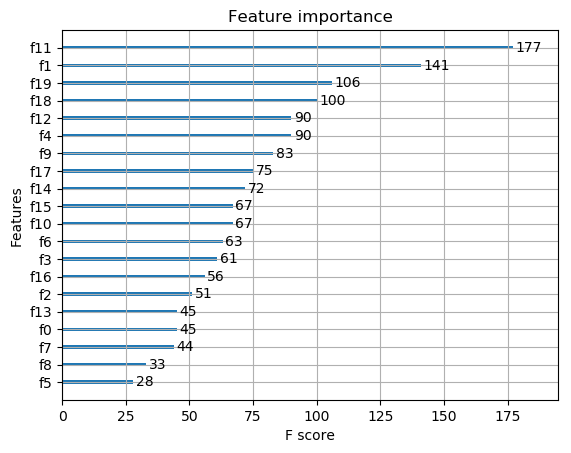

In [104]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [105]:
pred_df = pd.merge(features, kaggle_df, how='inner', on='person')

In [106]:
pred_df.head()

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,...,cantidad de veces que vio un producto el ultimo mes,cantidad de veces que vio un producto la ultima semana,cantidad de checkouts en la ultima semana,cantidad de conversiones por visita,cantidad de returnings en el ultimo mes,cantidad de returnings en la ultima semana,cantidad de dias desde la ultima conversion,cantidad de dias desde la ultima vista a producto,cantidad de dias desde el ultimo checkout,usuario de brazil
0,0,4886f805,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,180.0,14.0,14.0,1.0
1,2,0297fc1e,0.0,404.0,95.0,7.0,64.0,0.0,1.0,0.0,...,133.0,43.0,0.0,0.0,29.0,9.0,180.0,4.0,10.0,1.0
2,3,2d681dd8,0.0,13.0,2.0,1.0,2.0,0.0,0.0,0.0,...,13.0,7.0,1.0,0.0,1.0,1.0,180.0,5.0,5.0,1.0
3,4,cccea85e,0.0,739.0,22.0,1.0,18.0,0.0,2.0,1.0,...,739.0,235.0,0.0,0.0,21.0,9.0,180.0,1.0,21.0,1.0
4,5,4c8a8b93,0.0,177.0,20.0,2.0,13.0,0.0,21.0,0.0,...,177.0,0.0,0.0,0.0,19.0,0.0,180.0,10.0,13.0,1.0


In [107]:
X_train = np.array(test_df.iloc[:, 2:22]) 
y_train = np.array(test_df['label']) 
X_test = np.array(pred_df.iloc[:, 2:22]) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [108]:
xg_reg.fit(X_train,y_train)
pred_df['label'] = xg_reg.predict(X_test)

In [109]:
#Error de las predicciones finales
final_preds_error = np.sqrt(mean_squared_error(y_test, preds))
print("Error: %f" % (final_preds_error))

Error: 0.196829


In [110]:
pred_df.head(20)

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,...,cantidad de veces que vio un producto la ultima semana,cantidad de checkouts en la ultima semana,cantidad de conversiones por visita,cantidad de returnings en el ultimo mes,cantidad de returnings en la ultima semana,cantidad de dias desde la ultima conversion,cantidad de dias desde la ultima vista a producto,cantidad de dias desde el ultimo checkout,usuario de brazil,label
0,0,4886f805,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,180.0,14.0,14.0,1.0,0.004590
1,2,0297fc1e,0.0,404.0,95.0,7.0,64.0,0.0,1.0,0.0,...,43.0,0.0,0.000000,29.0,9.0,180.0,4.0,10.0,1.0,0.036275
2,3,2d681dd8,0.0,13.0,2.0,1.0,2.0,0.0,0.0,0.0,...,7.0,1.0,0.000000,1.0,1.0,180.0,5.0,5.0,1.0,0.006395
3,4,cccea85e,0.0,739.0,22.0,1.0,18.0,0.0,2.0,1.0,...,235.0,0.0,0.000000,21.0,9.0,180.0,1.0,21.0,1.0,0.086678
4,5,4c8a8b93,0.0,177.0,20.0,2.0,13.0,0.0,21.0,0.0,...,0.0,0.0,0.000000,19.0,0.0,180.0,10.0,13.0,1.0,0.017408
5,7,29ebb414,0.0,8.0,4.0,1.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,3.0,0.0,180.0,14.0,14.0,1.0,0.006513
6,11,3dc1950f,0.0,595.0,30.0,3.0,24.0,0.0,10.0,16.0,...,51.0,0.0,0.000000,17.0,4.0,180.0,8.0,14.0,1.0,0.045131
7,12,8ea4c165,0.0,97.0,7.0,3.0,6.0,3.0,0.0,9.0,...,0.0,0.0,0.000000,5.0,0.0,180.0,14.0,17.0,1.0,0.016658
8,14,d8cfe234,1.0,39.0,4.0,3.0,4.0,0.0,0.0,8.0,...,0.0,0.0,4.000000,3.0,0.0,10.0,10.0,10.0,1.0,0.022720
9,17,d6bc64df,0.0,155.0,7.0,2.0,2.0,0.0,18.0,0.0,...,0.0,0.0,0.000000,2.0,0.0,180.0,14.0,14.0,1.0,0.018897


In [111]:
#Armo el submit
out_df = pred_df[['person', 'label']]
out_df.set_index('person', inplace=True)
out_df.head()

,label
person,
4886f805,0.004590
0297fc1e,0.036275
2d681dd8,0.006395
cccea85e,0.086678
4c8a8b93,0.017408


In [112]:
out_df.to_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/DatosReloaded/TP2/Final/submit.csv')
# out_df.to_csv('D:/DATOS/RELOADED/csv/submit.csv')

In [23]:
# out_df[out_df['label'] > 0.4]

**Cross validation**

**n_estimators**

In [808]:
params = {"objective":"reg:linear",'colsample_bytree': 0.35,
          'learning_rate': 0.13, 'max_depth': 5, 'alpha': 10, 'silent': 1}

cv_scores = []

for n in range(10, 100, 5):
    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=n, early_stopping_rounds=10,
                    metrics="auc", as_pandas=True, seed=123);
    cv_scores.append(cv_results.iloc[-1]['test-auc-mean'])


In [809]:
cv_scores

[0.830186,
 0.8500023999999999,
 0.8550558,
 0.8581405999999999,
 0.8612304,
 0.8624940000000001,
 0.8626826,
 0.8628879999999999,
 0.8627262,
 0.8630356000000001,
 0.8630356000000001,
 0.8630356000000001,
 0.8630356000000001,
 0.8630356000000001,
 0.8630356000000001,
 0.8630356000000001,
 0.8630356000000001,
 0.8630356000000001]

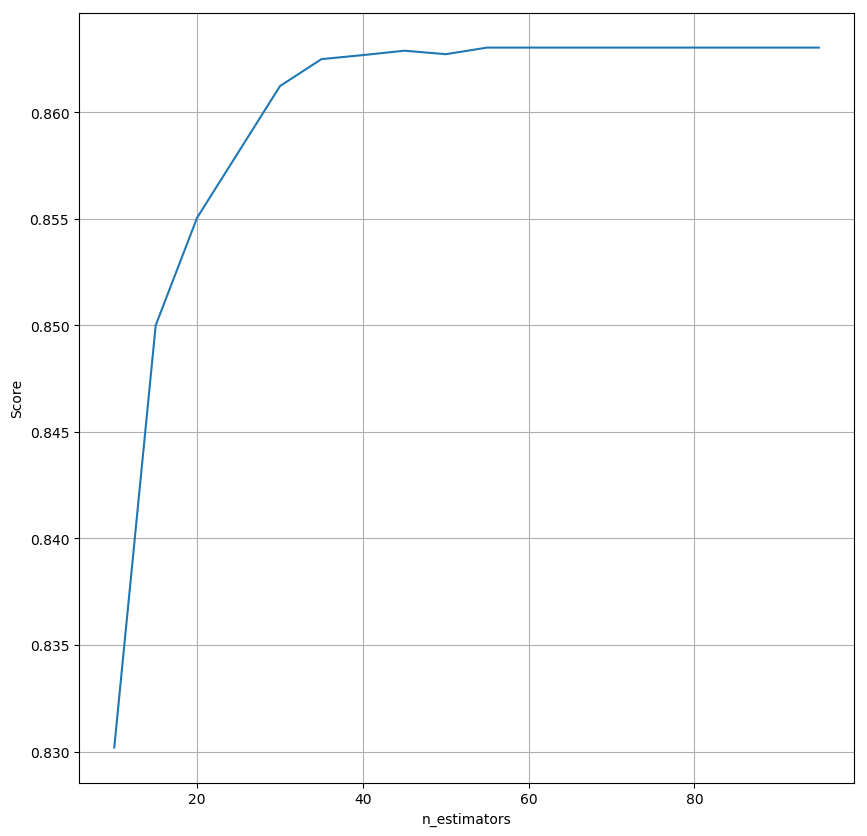

In [811]:
abscisa=range(10, 100, 5)
plt.plot(abscisa, cv_scores)
plt.grid()
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.show()

**learning rate**

In [812]:
cv_scores = []

for n in range(1, 11):
    eta=n*0.05
    params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': eta, 'max_depth': 5, 'alpha': 10, 'silent': 1}
    print(eta)
    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="auc", as_pandas=True, seed=123);
    cv_scores.append(cv_results.iloc[-1]['test-auc-mean'])

0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5


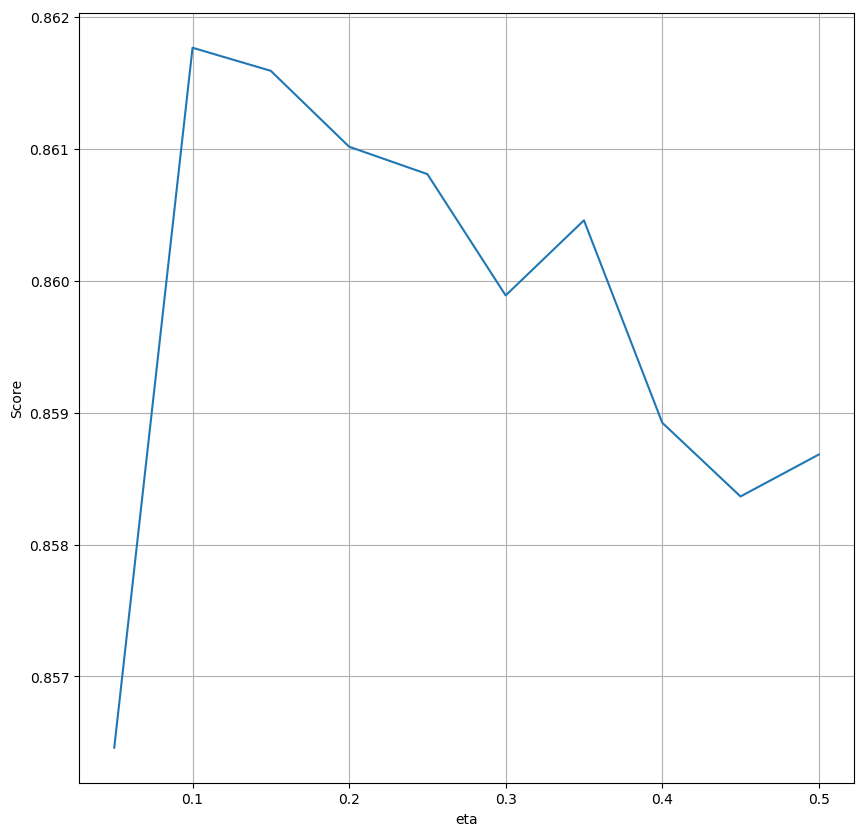

In [813]:
plt.plot([x * 0.05 for x in range(1, 11)], cv_scores)
plt.grid()
plt.xlabel('eta')
plt.ylabel('Score')
plt.show()

**max_depth**

In [814]:
cv_scores = []

for n in range(1, 11):
    params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': n, 'alpha': 10, 'silent': 1}

    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="auc", as_pandas=True, seed=123);
    cv_scores.append(cv_results.iloc[-1]['test-auc-mean'])

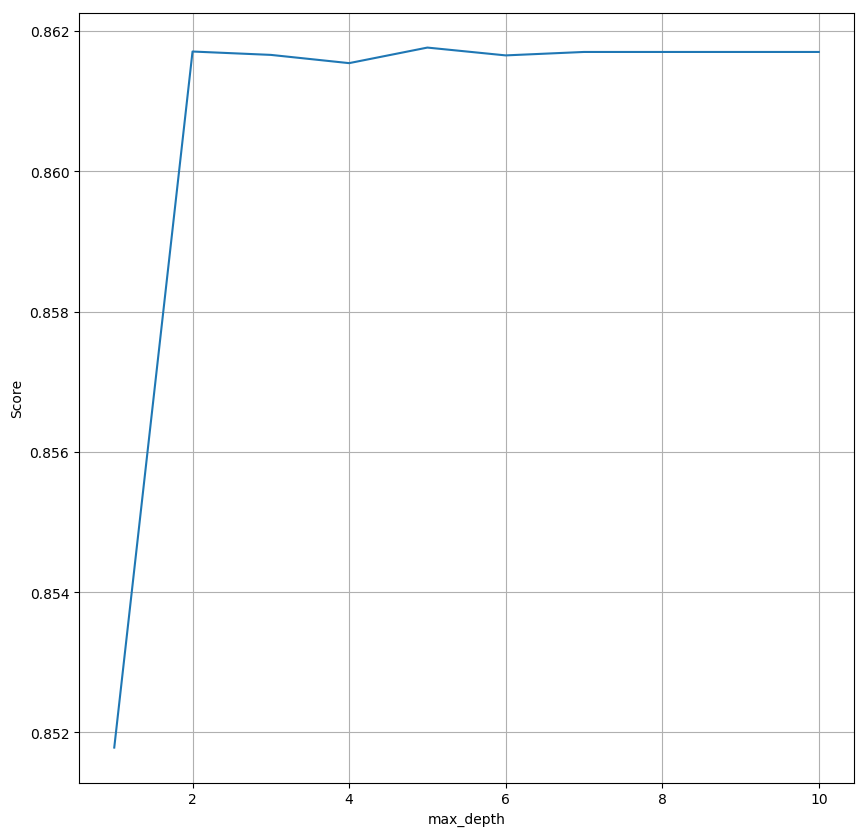

In [815]:
plt.plot([x for x in range(1, 11)], cv_scores)
plt.grid()
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.show()

**colsample_bytree** (Valor muy alto: overfitting)

In [816]:
cv_scores = []

for n in range(1, 16):
    cst=n*0.05
    params = {"objective":"reg:linear",'colsample_bytree': cst,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10, 'silent': 1}

    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="auc", as_pandas=True, seed=123);
    cv_scores.append(cv_results.iloc[-1]['test-auc-mean'])

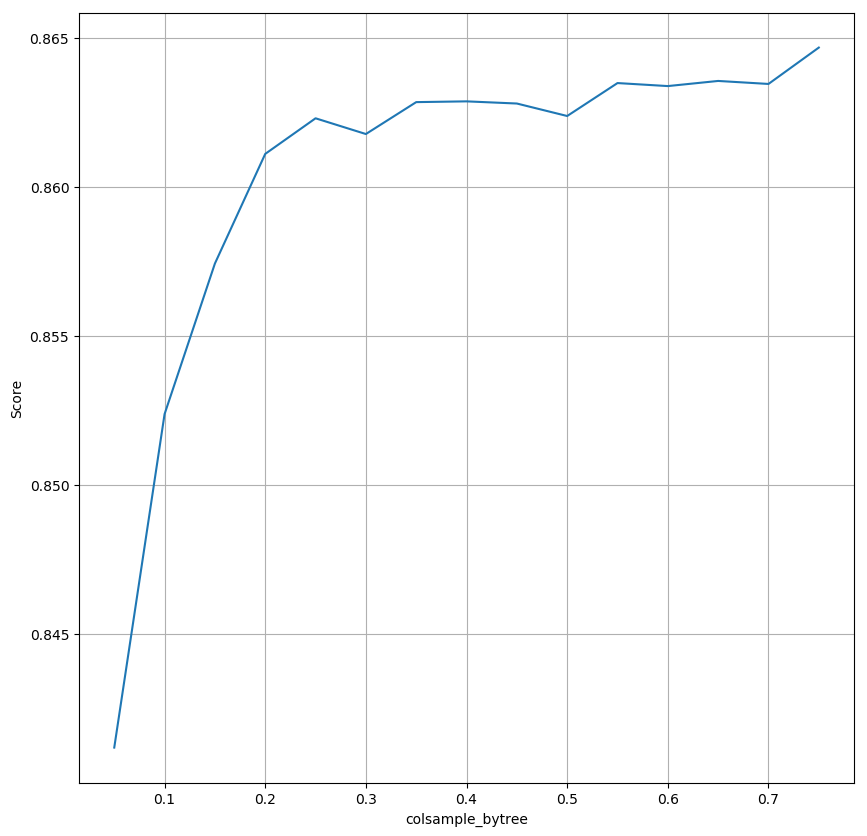

In [817]:
plt.plot([x*0.05 for x in range(1, 16)], cv_scores)
plt.grid()
plt.xlabel('colsample_bytree')
plt.ylabel('Score')
plt.show()

**alpha**

In [778]:
cv_scores = []

for n in range(1, 16):
    params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': n, 'silent': 1}

    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="auc", as_pandas=True, seed=123);
    cv_scores.append(cv_results.iloc[-1]['test-auc-mean'])

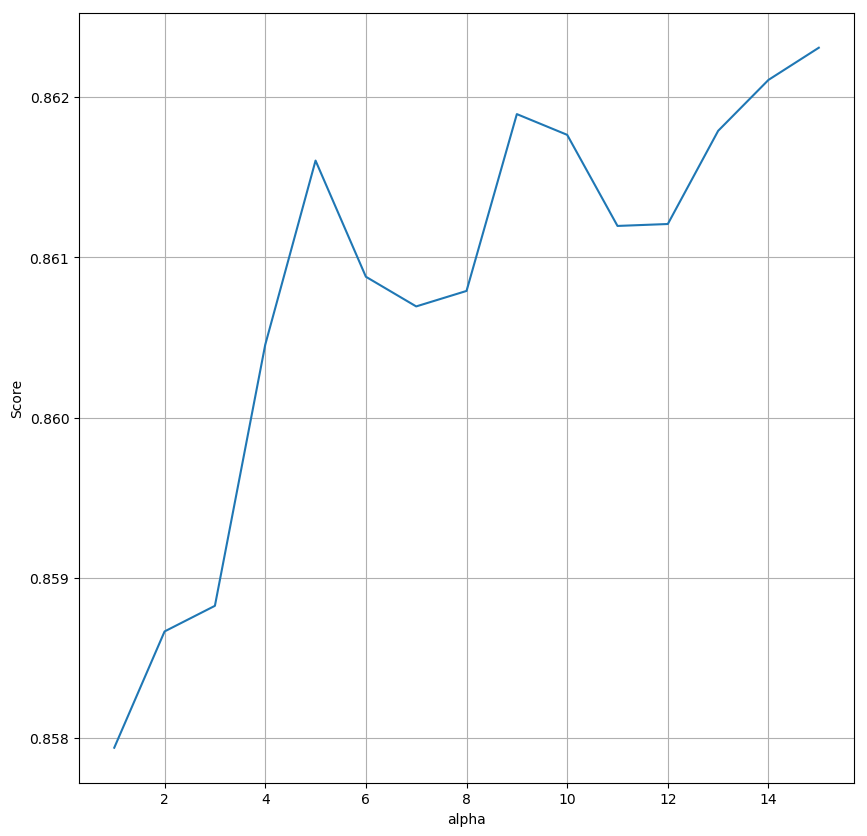

In [779]:
plt.plot([x for x in range(1, 16)], cv_scores)
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Score')
plt.show()